
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Імпортую бібліотеки

In [1]:
import pandas as pd
import numpy as np

Зчитую дані з файлу у датафрейм


In [2]:
df = pd.read_csv('clean_data_4.csv')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Буду використовувати тільки числові дані


In [3]:
df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [4]:
x_data = df[['Population', 'Area']]
y_data = df['CO2 emission']

Випадковим чином розділяю дані на навчальні та тестові (20% загального набору в якості тестових даних).


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 44
number of training samples: 173


In [6]:
x_train.head()

,Population,Area
117,2081206.0,25710
47,23695919.0,322460
27,30661.0,150
59,6344722.0,21040
40,17909754.0,756096


In [7]:
y_train.head()

117     7510.016
47     11045.004
27       179.683
59      6285.238
40     82562.505
Name: CO2 emission, dtype: float64

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
При цьому одномірна модель для ознаки Population була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [8]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

lre.fit(x_train[['Population']], y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [9]:
print('R^2 на навчальних даних: ', lre.score(x_train[['Population']], y_train))
print('R^2 на тестових даних: ', lre.score(x_test[['Population']], y_test))

R^2 на навчальних даних:  0.6476003431375894
R^2 на тестових даних:  0.5154367821954019


<p>Вони різні бо створена модель не здатна показувати ту ж ефективність (або краща) для даних, з якими раніше не працювала</p>
<p>При виборі моделі треба орієнтуватись на її ефективність у роботі з новими даними (відсутність пере- та недо- навчання)<p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


In [10]:
from sklearn.preprocessing import PolynomialFeatures

Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


In [11]:
# Виконую поліноміальне перетворення 2 ступеня для ознаки 'Population'
pr = PolynomialFeatures(degree=2)
x_train_pr1 = pr.fit_transform(x_train[['Population']])
x_test_pr1 = pr.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

# На тестових даних обчислюю R^2
poly1.score(x_test_pr1, y_test)

0.5211384299071617

Будую поліноміальну модель 3 ступеня, на тестових даних обчислюю R^2


In [12]:
# Виконую поліноміальне перетворення 3 ступеня для ознаки 'Population'
pr = PolynomialFeatures(degree=3)
x_train_pr2 = pr.fit_transform(x_train[['Population']])
x_test_pr2 = pr.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly2 = LinearRegression()
poly2.fit(x_train_pr2, y_train)

# На тестових даних обчислюю R^2
poly2.score(x_test_pr2, y_test)

0.23057278510951718

Будую поліноміальну модель 4 ступеня, на тестових даних обчислюю R^2


In [13]:
# Виконую поліноміальне перетворення 4 ступеня для ознаки 'Population'
pr = PolynomialFeatures(degree=4)
x_train_pr3 = pr.fit_transform(x_train[['Population']])
x_test_pr3 = pr.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly3 = LinearRegression()
poly3.fit(x_train_pr3, y_train)

# На тестових даних обчислюю R^2
poly3.score(x_test_pr3, y_test)

-0.12332512457570766

Найкращою є модель 2 ступеня, бо для 4 ступеня вже спостерігається перенавчання, про що свідчить від'ємне значення R^2 .


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


In [14]:
from sklearn.linear_model import Ridge

Будую модель гребеневої регресії, обчислюю R^2


In [15]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [16]:
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
RigeModel = Ridge(alpha=10)

Будую модель

In [17]:
RigeModel.fit(x_train_pr, y_train)

D:\anaconda_jup\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.50471e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

Обчислюю R^2

In [18]:
print('R^2 на навчальному наборі: ', RigeModel.score(x_train_pr, y_train))
print('R^2 на тестовому наборі: ', RigeModel.score(x_test_pr, y_test))

R^2 на навчальному наборі:  0.9475114634042926
R^2 на тестовому наборі:  -1.8141470300329838


Результати показують, що створена модель гребенової регресії є перенавченою і погано справляється з раніше не баченими даними

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


In [19]:
from sklearn.model_selection import GridSearchCV

Створю об'єкт гребеневої регресії

In [20]:
R_model = Ridge()
R_model

Ridge()

Створюю словник значень параметрів:


In [21]:
parameters = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [22]:
Grid = GridSearchCV(R_model, parameters, cv=4)

Підбираю модель:


In [23]:
Grid.fit(x_data, y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [24]:
Best_Ridge = Grid.best_estimator_
Best_Ridge

Ridge(alpha=1000000)

Тестую модель на тестових даних (обчислюю R^2):


In [25]:
Best_Ridge.score(x_test, y_test)

0.35069438211259285

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих)</p>
</div>


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


In [27]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('CO2 emission')
    plt.ylabel('Country parametrs')
    plt.legend(loc='upper right', labels=['Predicted', 'Actual'])
    
    plt.show()
    plt.close()

Будую візуалізацію для оцінки якості лінійної моделі

In [28]:
yhat_test= lre.predict(x_test[['Population']])

C:\Users\Користувач\AppData\Local\Temp\ipykernel_21880\3244086526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

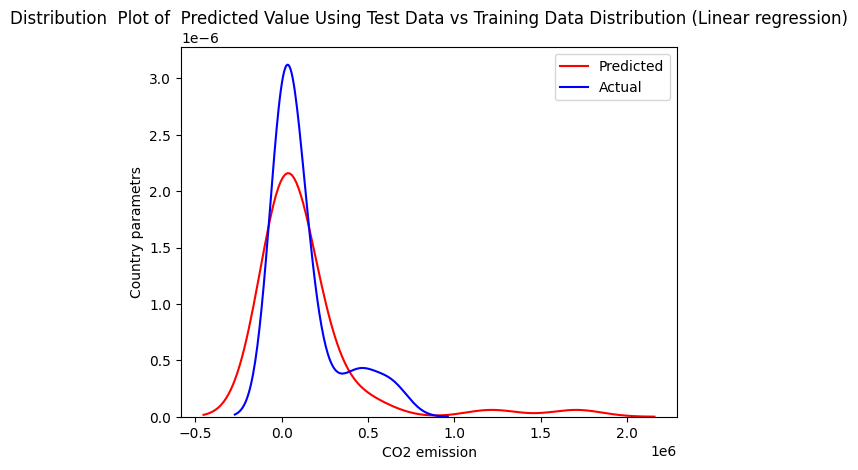

In [29]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Training Data Distribution (Linear regression)'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title) 

Будую візуалізацію для оцінки якості кращої поліноміальної моделі (ступеня 2)

In [30]:
yhat_test = poly1.predict(x_test_pr1)

C:\Users\Користувач\AppData\Local\Temp\ipykernel_21880\3244086526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

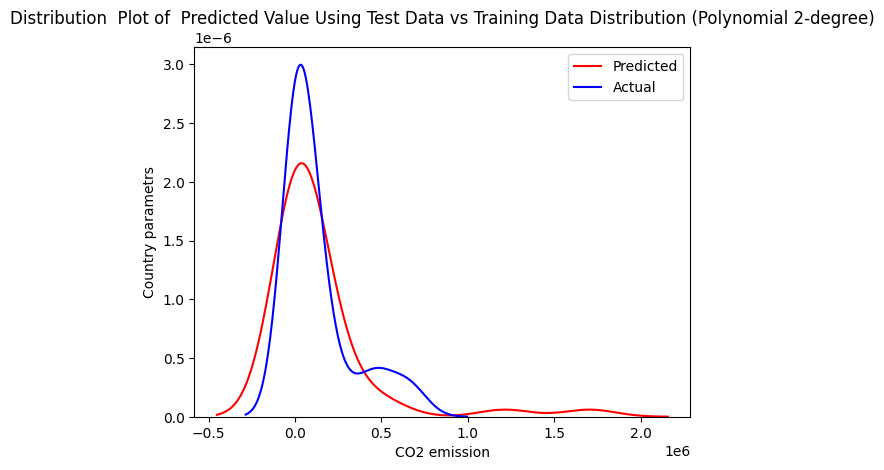

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Training Data Distribution (Polynomial 2-degree)'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title) 

Будую візуалізацію для оцінки якості кращої гребеневої моделі

In [32]:
yhat_test = Best_Ridge.predict(x_test)

C:\Users\Користувач\AppData\Local\Temp\ipykernel_21880\3244086526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda_jup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

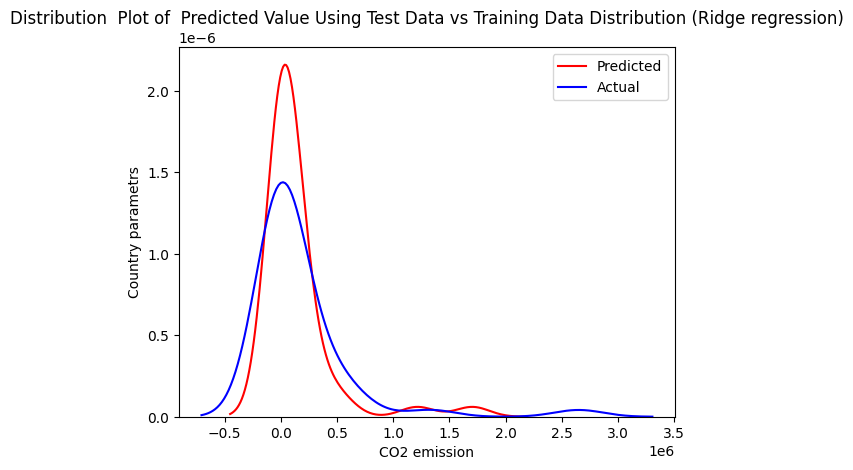

In [33]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Training Data Distribution (Ridge regression)'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title) 

<h2>Виконав студент групи ІП-21 <br> Пізнак Роман</h2>
